In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [11]:
# Load the dataset
data = pd.read_csv("/content/HeartDisease.csv")

# Fill missing values....... fill with mean median mode depending on data type

# For numerical columns
numerical_cols = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay', 'age']
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# For categorical columns
categorical_cols = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])


# Determine the split indices according to the requirements
total_rows = len(data)
train_end = int(total_rows * 0.7)
val_end = int(total_rows * 0.85)

# Split the dataset
train_data = data.iloc[:train_end]
val_data = data.iloc[train_end:val_end]
test_data = data.iloc[val_end:]

# Separate features and target variable if you have one (uncomment and adjust if needed)
X_train = train_data.drop('HeartDisease', axis=1)
Y_train = train_data['HeartDisease']

X_val = val_data.drop('HeartDisease', axis=1)
Y_val = val_data['HeartDisease']

X_test = test_data.drop('HeartDisease', axis=1)
Y_test = test_data['HeartDisease']

# Check the sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 2966
Validation set size: 636
Test set size: 636


In [12]:
#converting the pandas dataframe to numpy array

X_train = X_train.values
Y_train = Y_train.values

X_test = X_test.values
Y_test = Y_test.values

X_val = X_val.values
Y_val = Y_val.values


In [13]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [14]:
def accuracy(predictions, groundTruth):
  return np.mean(predictions == groundTruth)* 100

In [25]:
class LogisticRegression():

    def __init__(self, learningRate, epochs):
        self.learningRate = learningRate
        self.epochs = epochs
        self.weights = None
        self.bias = None

        self.costList = None
        self.accuracyList = None
        self.valCostList = None
        self.valAccList = None

    def getValCost(self):
      return self.valCostList

    def getValAcc(self):
      return self.valAccList

    def getLoss(self):
      return self.costList

    def getAccuracy(self):
      return self.accuracyList

    def gradientDescent(self, X, Y):
        m, n = X.shape
        self.weights = np.ones(n) #initialising the weights as 0s
        self.bias = 1 #initialising the bias as zero

        self.costList = []
        self.accuracyList = []
        self.valCostList = []
        self.valAccList = []

        epsilon = 1e-10  # Small constant to prevent log(0)

        for _ in range(self.epochs):

            hypothesis = np.dot(X, self.weights) + self.bias
            Y_prediction = sigmoid(hypothesis)

            # Cost Function J(w, b), cross entropy loss
            cost = -(1/m) * np.sum(Y * np.log(Y_prediction + epsilon) + (1 - Y) * np.log(1 - Y_prediction + epsilon))

            #Accuracy
            classification = [0 if y<=0.5 else 1 for y in Y_prediction]
            acc = accuracy(classification, Y)

            self.costList.append(cost)
            self.accuracyList.append(acc)

            #validation
            modelPredictions_val = self.classify(X_val)
            valacc = accuracy(modelPredictions_val, Y_val)
            self.valAccList.append(valacc)
            hypothesis = np.dot(X_val, self.weights) + self.bias
            Y_prediction1 = sigmoid(hypothesis)
            valcost = -(1/m) * np.sum(Y_val * np.log(Y_prediction1 + epsilon) + (1 - Y_val) * np.log(1 - Y_prediction1 + epsilon))
            self.valCostList.append(valcost)

            #calculating the gradients (partial derivative of the cost function J(w, b) wrt weights and bias)
            dw = (1/m) * np.dot(X.T, (Y_prediction - Y))
            db = (1/m) * np.sum(Y_prediction - Y)

            self.weights = self.weights - self.learningRate * dw
            self.bias = self.bias - self.learningRate * db

            if _ % (self.epochs // 10) == 0:  # Print cost every 10% of iterations
                print(f"Cost after {_} iterations: {cost} & accuracy : {acc}")


    def classify(self, X):
        m, n = X.shape

        hypothesis = np.dot(X, self.weights) + self.bias
        Y_prediction = sigmoid(hypothesis)

        classLabels = [0 if y <= 0.5 else 1 for y in Y_prediction]

        return classLabels

In [26]:
#using the logistic regression model with learning rate and number of iters passed as parameters
model = LogisticRegression(0.0001, 50000)

#training the model on training data
model.gradientDescent(X_train, Y_train)
trainingLoss = model.costList

#testing the model on training data
trainingAcc = model.accuracyList

#storing predictions for the training data
modelPredictions_train = model.classify(X_train)

print("-----------####------####------####-------------")

#training the model on validation data
# model.gradientDescent(X_val, Y_val)
validationLoss = model.getValCost()

#testing the model on validation data
validationAcc = model.getValAcc()

#storing predictions for the validation data
modelPredictions_val = model.classify(X_val)

Cost after 0 iterations: 19.493564290301745 & accuracy : 15.340525960890089
Cost after 5000 iterations: 1.0275486481798 & accuracy : 75.85974376264329
Cost after 10000 iterations: 0.5746220654935927 & accuracy : 79.39986513823331
Cost after 15000 iterations: 0.5095767000742784 & accuracy : 80.91706001348618
Cost after 20000 iterations: 0.4885331585706452 & accuracy : 81.75994605529333
Cost after 25000 iterations: 0.4774059010050358 & accuracy : 82.40053944706676
Cost after 30000 iterations: 0.46938467706783127 & accuracy : 82.67026298044505
Cost after 35000 iterations: 0.4627620209385742 & accuracy : 83.14227916385704
Cost after 40000 iterations: 0.4570536947277995 & accuracy : 83.2771409305462
Cost after 45000 iterations: 0.4520759460867736 & accuracy : 83.34457181389077
-----------####------####------####-------------


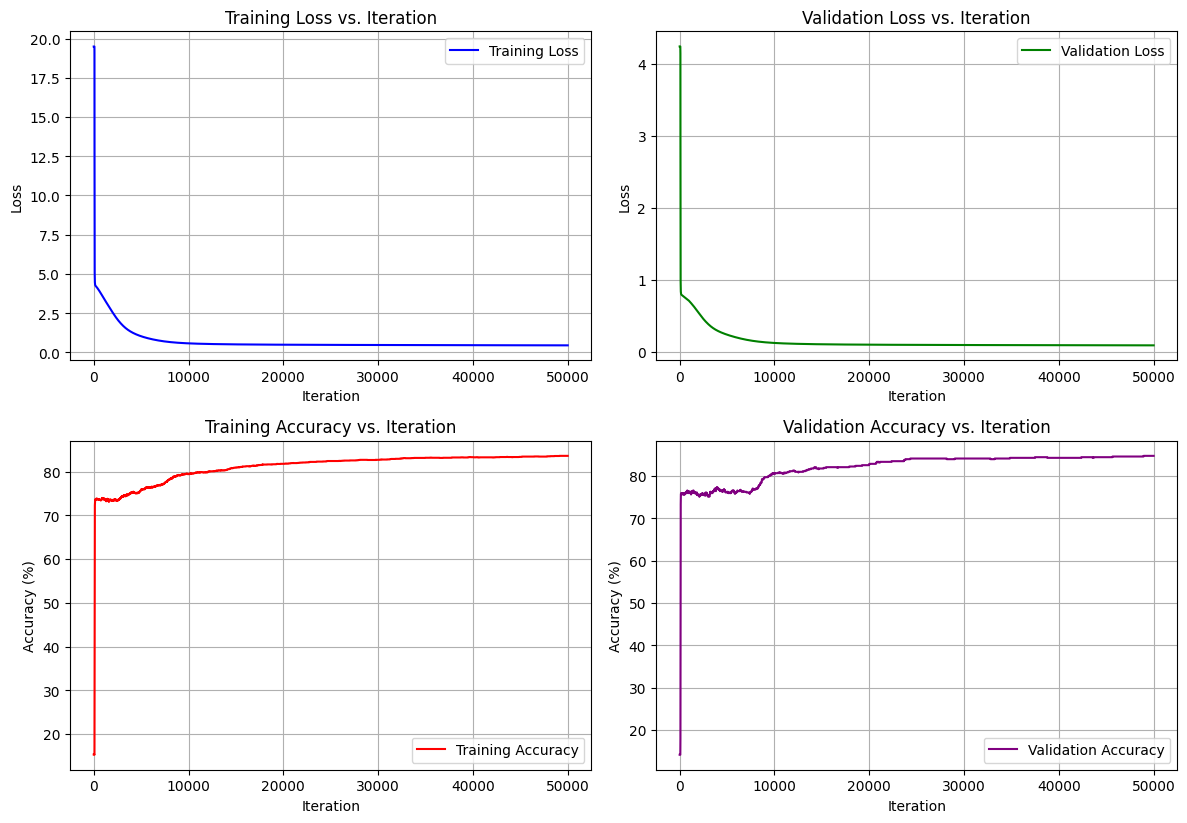

In [28]:

# Set the figure size to make the graphs larger
plt.figure(figsize=(12, 12))

# Define colors for each plot
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Plot 1: Training Loss
plt.subplot(3, 2, 1)
plt.plot(range(len(trainingLoss)), trainingLoss, label='Training Loss', color=colors[0])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss vs. Iteration')
plt.legend()
plt.grid(True)

# Plot 2: Validation Loss
plt.subplot(3, 2, 2)
plt.plot(range(len(validationLoss)), validationLoss, label='Validation Loss', color=colors[1])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Iteration')
plt.legend()
plt.grid(True)

# Plot 3: Training Accuracy
plt.subplot(3, 2, 3)
plt.plot(range(len(trainingAcc)), [x for x in trainingAcc], label='Training Accuracy', color=colors[2])
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy vs. Iteration')
plt.legend()
plt.grid(True)

# Plot 4: Validation Accuracy
plt.subplot(3, 2, 4)
plt.plot(range(len(validationAcc)), [x for x in validationAcc], label='Validation Accuracy', color=colors[3])
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy vs. Iteration')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


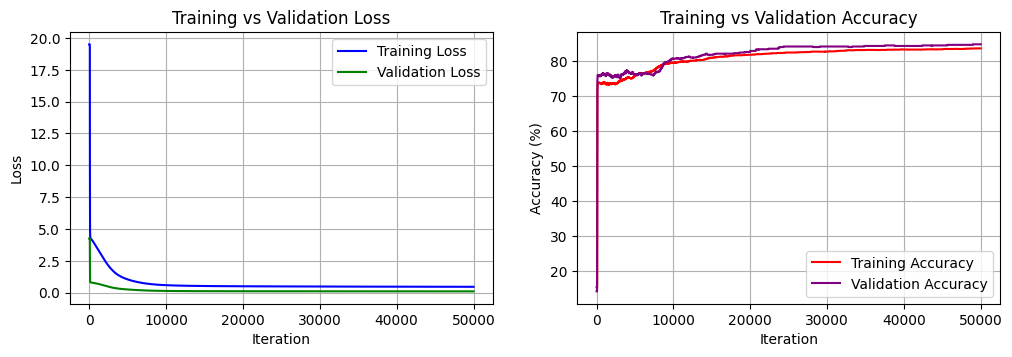

In [27]:
# Set the figure size to make the graphs larger
plt.figure(figsize=(12, 12))

# Plot 5: Training vs Validation Loss
plt.subplot(3, 2, 5)
plt.plot(range(len(trainingLoss)), trainingLoss, label='Training Loss', color=colors[0])
plt.plot(range(len(validationLoss)), validationLoss, label='Validation Loss', color=colors[1])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

# Plot 6: Training vs Validation Accuracy
plt.subplot(3, 2, 6)
plt.plot(range(len(trainingAcc)), [x for x in trainingAcc], label='Training Accuracy', color=colors[2])
plt.plot(range(len(validationAcc)), [x for x in validationAcc], label='Validation Accuracy', color=colors[3])
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)